In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import requests
import re
import numpy as np

In [3]:
api_key = 'JRLl3R4GkcNCPAmwzo4vfUIfwttQbJlcv3ghqaJg'

In [4]:
url = f'https://api.fda.gov/drug/event.json?api_key={api_key}&search=patient.drug.medicinalproduct:"ENFUVIRTIDE"+AND+patient.drug.medicinalproduct:"VALCYTE"&limit=10'

In [5]:
response = requests.get(url)

In [6]:
print(response)

<Response [200]>


In [7]:
data = response.json()

In [8]:
results = data.get('results', [])

In [9]:
df = pd.json_normalize(results)

In [10]:
df.head(10)

,safetyreportid,transmissiondateformat,transmissiondate,serious,seriousnesshospitalization,receivedateformat,receivedate,receiptdateformat,receiptdate,fulfillexpeditecriteria,companynumb,receiver,primarysource.qualification,sender.senderorganization,patient.patientonsetage,patient.patientonsetageunit,patient.patientweight,patient.patientsex,patient.reaction,patient.drug,seriousnessdeath,seriousnessdisabling,patient.patientdeath.patientdeathdateformat,patient.patientdeath.patientdeathdate,primarysource.reportercountry
0,4332068-5,102,20050107,1,1,102,20040405,102,20030905,1,FR-ROCHE-346272,None,1,FDA-Public Use,48,801,79,1,"[{'reactionmeddrapt': 'COUGH'}, {'reactionmedd...","[{'drugcharacterization': '1', 'medicinalprodu...",NaN,NaN,NaN,NaN,NaN
1,4313623-5,102,20041129,1,1,102,20040305,102,20040223,1,03P-163-0234177-00,None,1,FDA-Public Use,42,801,NaN,1,"[{'reactionmeddrapt': 'KAPOSI'S SARCOMA'}, {'r...","[{'drugcharacterization': '1', 'medicinalprodu...",1,1,NaN,NaN,NaN
2,4661719-0,102,20051028,1,1,102,20050513,102,20041019,1,US-ROCHE-383715,None,1,FDA-Public Use,55,801,62.6,1,"[{'reactionmeddrapt': 'ANAEMIA'}, {'reactionme...","[{'drugcharacterization': '1', 'medicinalprodu...",NaN,NaN,NaN,NaN,NaN
3,5395349-2,102,20080115,1,1,102,20070724,102,20070719,1,US-ABBOTT-03P-163-0234177-00,None,NaN,FDA-Public Use,NaN,NaN,NaN,1,"[{'reactionmeddrapt': 'PNEUMONIA'}, {'reaction...","[{'drugcharacterization': '1', 'medicinalprodu...",1,1,NaN,NaN,UNITED STATES
4,6251992-X,102,20091009,1,1,102,20090630,102,20050202,1,US-ROCHE-638337,None,1,FDA-Public Use,NaN,NaN,NaN,1,"[{'reactionmeddrapt': 'ANAEMIA'}, {'reactionme...","[{'drugcharacterization': '1', 'medicinalprodu...",NaN,NaN,NaN,NaN,UNITED STATES
5,6251998-0,102,20091009,1,1,102,20090630,102,20040715,1,US-ROCHE-638353,None,1,FDA-Public Use,NaN,NaN,NaN,1,"[{'reactionmeddrapt': 'CACHEXIA'}, {'reactionm...","[{'drugcharacterization': '1', 'medicinalprodu...",NaN,NaN,NaN,NaN,UNITED STATES
6,6252001-9,102,20091009,1,1,102,20090630,102,20041229,1,US-ROCHE-638386,None,1,FDA-Public Use,NaN,NaN,NaN,1,[{'reactionmeddrapt': 'UPPER RESPIRATORY TRACT...,"[{'drugcharacterization': '1', 'medicinalprodu...",NaN,NaN,NaN,NaN,UNITED STATES
7,6252033-0,102,20091009,1,1,102,20090630,102,20070414,1,US-ROCHE-638600,None,1,FDA-Public Use,NaN,NaN,NaN,2,[{'reactionmeddrapt': 'PNEUMOCYSTIS JIROVECI P...,"[{'drugcharacterization': '1', 'medicinalprodu...",NaN,NaN,NaN,NaN,UNITED STATES
8,6252034-2,102,20091009,1,1,102,20090630,102,20041111,1,US-ROCHE-638662,None,1,FDA-Public Use,NaN,NaN,NaN,1,[{'reactionmeddrapt': 'CYTOMEGALOVIRUS COLITIS'}],"[{'drugcharacterization': '1', 'medicinalprodu...",NaN,NaN,NaN,NaN,UNITED STATES
9,6252137-2,102,20091009,1,1,102,20090630,102,20041111,1,US-ROCHE-639206,None,1,FDA-Public Use,NaN,NaN,NaN,1,"[{'reactionmeddrapt': 'DEHYDRATION'}, {'reacti...","[{'drugcharacterization': '1', 'medicinalprodu...",NaN,NaN,NaN,NaN,UNITED STATES


In [11]:
df1 = df.copy()

In [12]:
# Extract serious column names
serious_cols = []
for col in df1.columns:
    if re.search("serious", col):
        serious_cols.append(col)

print(serious_cols)

['serious', 'seriousnesshospitalization', 'seriousnessdeath', 'seriousnessdisabling']


In [13]:
top_features = [
    "patient.patientsex",
    "patient.patientonsetage",
    "patient.drug",
    "patient.reaction"
]

for col in serious_cols:
    top_features.append(col)

df1 = df1[top_features]

df1['drug_info'] = df1['patient.drug'].apply(
    lambda drugs: [(d.get('medicinalproduct'), d.get('drugcharacterization')) for d in drugs])

df1['observed_reactions'] = df1['patient.reaction'].apply(
    lambda reactions: [reaction.get('reactionmeddrapt') for reaction in reactions])

In [14]:
drop_cols = ['patient.drug', 'patient.reaction']
df2 = df1.copy()
df2 = df2.drop(drop_cols, axis=1)
df2

,patient.patientsex,patient.patientonsetage,serious,seriousnesshospitalization,seriousnessdeath,seriousnessdisabling,drug_info,observed_reactions
0,1,48,1,1,NaN,NaN,"[(ENFUVIRTIDE, 1), (EPIVIR, 2), (ATAZANAVIR, 2...","[COUGH, DYSPNOEA, FUNGUS SEROLOGY TEST POSITIV..."
1,1,42,1,1,1,1,"[(NORVIR, 1), (TIPRANAVIR, 2), (ABACAVIR SULFA...","[KAPOSI'S SARCOMA, PNEUMONIA, RENAL FAILURE, R..."
2,1,55,1,1,NaN,NaN,"[(ENFUVIRTIDE, 1), (VALCYTE, 2), (DAPSONE, 2),...","[ANAEMIA, ILEUS, PNEUMONIA PRIMARY ATYPICAL, S..."
3,1,NaN,1,1,1,1,"[(RITONAVIR SOFT GELATIN CAPSULES, 1), (TIPRAN...","[PNEUMONIA, RENAL FAILURE, RESPIRATORY FAILURE..."
4,1,NaN,1,1,NaN,NaN,"[(ENFUVIRTIDE, 1), (INVIRASE, 2), (VIREAD, 2),...","[ANAEMIA, CANDIDIASIS, CYTOMEGALOVIRUS OESOPHA..."
5,1,NaN,1,1,NaN,NaN,"[(ENFUVIRTIDE, 1), (VALCYTE, 2), (VALCYTE, 2),...","[CACHEXIA, ENCEPHALITIS CYTOMEGALOVIRUS, ENCEP..."
6,1,NaN,1,1,NaN,NaN,"[(ENFUVIRTIDE, 1), (INVIRASE, 2), (VIDEX, 2), ...",[UPPER RESPIRATORY TRACT INFECTION]
7,2,NaN,1,1,NaN,NaN,"[(ENFUVIRTIDE, 1), (ENFUVIRTIDE, 1), (KALETRA,...","[PNEUMOCYSTIS JIROVECI PNEUMONIA, RENAL TUBULA..."
8,1,NaN,1,1,NaN,NaN,"[(ENFUVIRTIDE, 1), (ZIAGEN, 2), (VIDEX, 2), (V...",[CYTOMEGALOVIRUS COLITIS]
9,1,NaN,1,1,NaN,NaN,"[(ENFUVIRTIDE, 1), (ZIAGEN, 2), (VIDEX, 2), (V...","[DEHYDRATION, DIARRHOEA]"


In [16]:
# converting patientonsetage to integer
def integer_conversion(str_input):
    if pd.notna(str_input):
        return int(str_input)
    else:
        return np.nan

def serious_conversion(str_input):
    if pd.notna(str_input):
        return int(str_input)
    else:
        return 0
    
df3 = df2.copy()

select_cols = list(df3.columns)[:2]

for col in select_cols:
    df3[col] = df3[col].apply(integer_conversion)

for col in serious_cols:
    df3[col] = df3[col].apply(serious_conversion)

df3['patient.patientonsetage'] = df3['patient.patientonsetage'].fillna(df3['patient.patientonsetage'].mean())

df3

,patient.patientsex,patient.patientonsetage,serious,seriousnesshospitalization,seriousnessdeath,seriousnessdisabling,drug_info,observed_reactions
0,1,48.000000,1,1,0,0,"[(ENFUVIRTIDE, 1), (EPIVIR, 2), (ATAZANAVIR, 2...","[COUGH, DYSPNOEA, FUNGUS SEROLOGY TEST POSITIV..."
1,1,42.000000,1,1,1,1,"[(NORVIR, 1), (TIPRANAVIR, 2), (ABACAVIR SULFA...","[KAPOSI'S SARCOMA, PNEUMONIA, RENAL FAILURE, R..."
2,1,55.000000,1,1,0,0,"[(ENFUVIRTIDE, 1), (VALCYTE, 2), (DAPSONE, 2),...","[ANAEMIA, ILEUS, PNEUMONIA PRIMARY ATYPICAL, S..."
3,1,48.333333,1,1,1,1,"[(RITONAVIR SOFT GELATIN CAPSULES, 1), (TIPRAN...","[PNEUMONIA, RENAL FAILURE, RESPIRATORY FAILURE..."
4,1,48.333333,1,1,0,0,"[(ENFUVIRTIDE, 1), (INVIRASE, 2), (VIREAD, 2),...","[ANAEMIA, CANDIDIASIS, CYTOMEGALOVIRUS OESOPHA..."
5,1,48.333333,1,1,0,0,"[(ENFUVIRTIDE, 1), (VALCYTE, 2), (VALCYTE, 2),...","[CACHEXIA, ENCEPHALITIS CYTOMEGALOVIRUS, ENCEP..."
6,1,48.333333,1,1,0,0,"[(ENFUVIRTIDE, 1), (INVIRASE, 2), (VIDEX, 2), ...",[UPPER RESPIRATORY TRACT INFECTION]
7,2,48.333333,1,1,0,0,"[(ENFUVIRTIDE, 1), (ENFUVIRTIDE, 1), (KALETRA,...","[PNEUMOCYSTIS JIROVECI PNEUMONIA, RENAL TUBULA..."
8,1,48.333333,1,1,0,0,"[(ENFUVIRTIDE, 1), (ZIAGEN, 2), (VIDEX, 2), (V...",[CYTOMEGALOVIRUS COLITIS]
9,1,48.333333,1,1,0,0,"[(ENFUVIRTIDE, 1), (ZIAGEN, 2), (VIDEX, 2), (V...","[DEHYDRATION, DIARRHOEA]"


# Distribution of Seriousness

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

serious_values = [int(serious) for serious in df3["serious"]]

mean = round(np.mean(serious_values), 2)
std = round(np.std(serious_values), 2)

if std > 0 and not np.isnan(std):
    x = np.linspace(mean - 4*std, mean + 4*std, 100)
    y = norm(loc=mean, scale=std).pdf(x)
    plt.plot(x, y, c="blue", label=f"μ={mean}, σ={std}")
    plt.legend()
else:
    print(f"Seriousness: {mean}") 

Seriousness: 1.0


# Seriousness Type Piechart¶

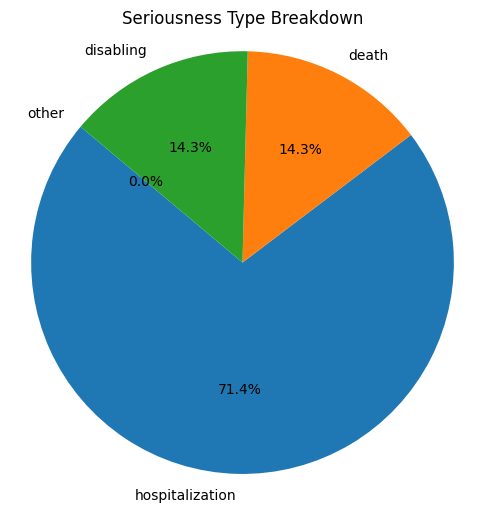

In [19]:
counts = {
            "hospitalization": df3["seriousnesshospitalization"].sum() if "seriousnesshospitalization" in df3 else 0,
            "death": df3["seriousnessdeath"].sum() if "seriousnessdeath" in df3 else 0,
            "disabling": df3["seriousnessdisabling"].sum() if "seriousnessdisabling" in df3 else 0,
            "other": df3["seriousnessother"].sum() if "seriousnessother" in df3 else 0,
}

labels = list(counts.keys())
sizes = list(counts.values())

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Seriousness Type Breakdown")
plt.axis('equal')
plt.show()

# Characterization Stacked Bar

In [20]:
counts = {"1": {"other": 0}, "2": {"other": 0}, "3": {"other": 0}}

for drug_list in df3["drug_info"]:
    for drug, characterization in drug_list:
        if drug == "ENFUVIRTIDE" or drug == "VALCYTE":
            if drug not in counts[characterization]:
                counts[characterization][drug] = 1
        else:
            counts[characterization]["other"] = 1

In [ ]:
counts